## Part 1

Create a matrix called transcriptome

In [9]:
#Make vectors with column and row names
elements<-c('Control','Nitrogen','Phosphate','Potassium')
genes<-c('GeneA','GeneB','GeneC','GeneD','GeneE')

#Make vectors with the value of every column
Control<-c(89,90,78,81,62)
Nitrogen<-c(78,99,94,83,51)
Phosphate<-c(77,85,99,80,99)
Potassium<-c(56,97,87,79,88)

#Create matrix with vectors defined as columns
#Name rows and columns with previously defined string vectors, print matrix
transcriptome<-matrix(c(Control, Nitrogen, Phosphate, Potassium),nrow=5,ncol=4)
colnames(transcriptome)<-elements
rownames(transcriptome)<-genes
transcriptome

,Control,Nitrogen,Phosphate,Potassium
GeneA,89,78,77,56
GeneB,90,99,85,97
GeneC,78,94,99,87
GeneD,81,83,80,79
GeneE,62,51,99,88


Calculate the Average expression for each gene accross all genes

In [10]:
#Loop through every row in the matrix and assign the mean to expression_average vector 
expression_average=numeric()
for (i in 1:nrow(transcriptome)){
    expression_average[i]=(mean(transcriptome[i,]))  
}
print(expression_average)

[1] 75.00 92.75 89.50 80.75 75.00


In [11]:
#Added expression_average column w/ cbind
transcriptome<-cbind(transcriptome, expression_average)
transcriptome

,Control,Nitrogen,Phosphate,Potassium,expression_average
GeneA,89,78,77,56,75.00
GeneB,90,99,85,97,92.75
GeneC,78,94,99,87,89.50
GeneD,81,83,80,79,80.75
GeneE,62,51,99,88,75.00


Sort the matrix so that the gene with the highest expression is on top. 

In [12]:
#Gene B has the highest avg expression, sorted in decreasing order, transcriptome assigned to new dataframe, sorted_genes
sorted_genes<-transcriptome[order(-expression_average),]
sorted_genes

,Control,Nitrogen,Phosphate,Potassium,expression_average
GeneB,90,99,85,97,92.75
GeneC,78,94,99,87,89.50
GeneD,81,83,80,79,80.75
GeneA,89,78,77,56,75.00
GeneE,62,51,99,88,75.00


Fold Change calculation 

In [13]:
getwd()

[1] "/Users/danielaquijano/Documents/GitHub/Transcriptomics-Course-Projects"

In [37]:
#Read in file as a table. Print first few rows
data=read.table('/Users/danielaquijano/Documents/NYU MASTERS/SPRING 2022/Transcriptomics/Source_Files/expvalues.txt',sep='')
#head(data)
data=as.matrix(data)
typeof(data)
head(data)


[1] "double"

,Control1,Control2,Control3,Treatment1,Treatment2,Treatment3
244901_at,229.98565,353.59949,178.49171,112.90800,152.91835,320.83235
244902_at,171.14980,84.45094,41.37195,170.17262,134.40814,193.52611
244903_at,314.97768,373.31250,52.90873,196.30256,237.51520,253.37774
244904_at,24.04366,175.31604,94.68424,82.78488,18.43639,87.00857
244905_at,15.86923,40.04125,58.76573,341.35340,16.80135,68.94204
244906_at,381.06379,218.90597,307.01488,162.54109,264.47945,263.66098


In [18]:
groups<-factor(c('control','control','control','experimental','experimental','experimental'))
tapply(as.numeric(data[1,]),groups,mean)


control experimental 
    254.0256     195.5529

In [36]:
avg_ctrl<-vector()

for (i in 1:nrow(data)){
    x<-tapply(as.numeric(data[i,]),groups,mean)
    avg_ctrl<-rbind(avg_ctrl,x)
}

rownames(avg_ctrl)<-rownames(data)
print(avg_ctrl)

                             control experimental
244901_at                 254.025616   195.552900
244902_at                  98.990896   166.035622
244903_at                 247.066305   229.065166
244904_at                  98.014648    62.743280
244905_at                  38.225406   142.365599
244906_at                 302.328213   230.227173
244907_at                  67.904823    51.465646
244908_at                  14.630018    18.626345
244909_at                  88.487355   107.204546
244910_s_at               174.751422    89.360042
244911_at                 130.436389    75.704285
244912_at                1548.610603  1516.357428
244913_at                  48.417724    12.598580
244914_at                  23.501566    54.308031
244915_s_at                49.792823    33.956783
244916_at                  19.759521    41.474078
244917_at                  16.089926    32.229495
244918_at                  47.336379    24.635327
244919_at                  83.133288    66.440442


In [26]:
control=numeric()
experimental=numeric()

for (i in 1:nrow(data)){
        control[i]=(mean(data[i,1:3])
}
print(control)

ERROR: Error in parse(text = x, srcfile = src): <text>:6:1: unexpected '}'
5:         control[i]=(mean(data[i,1:3])
6: }
   ^


In [28]:
test<-t(apply(as.matrix(data), 1, tapply, groups, mean))
print(test)

                             control experimental
244901_at                 254.025616   195.552900
244902_at                  98.990896   166.035622
244903_at                 247.066305   229.065166
244904_at                  98.014648    62.743280
244905_at                  38.225406   142.365599
244906_at                 302.328213   230.227173
244907_at                  67.904823    51.465646
244908_at                  14.630018    18.626345
244909_at                  88.487355   107.204546
244910_s_at               174.751422    89.360042
244911_at                 130.436389    75.704285
244912_at                1548.610603  1516.357428
244913_at                  48.417724    12.598580
244914_at                  23.501566    54.308031
244915_s_at                49.792823    33.956783
244916_at                  19.759521    41.474078
244917_at                  16.089926    32.229495
244918_at                  47.336379    24.635327
244919_at                  83.133288    66.440442


In [ ]:
#Calculate the ratio of average treatment/ average control for each gene

In [ ]:
#log fold change

In [ ]:
#How many genes have a log2 fold change > 1 OR < -1 

In [ ]:
#Save the names of the genes that have a log2 fold change > 1 into a file called “Induced_genes.txt” 

In [ ]:
#create a boxplot to show the distribution of values for each induced genes in each experiment. The x-axis should have all six experiments, and the y-axis is the expression level. Save the boxplot as a pdf file called “boxplot.pdf” 
library(ggplot2)
experiments<-c('Control1','Control2','Control3','Control4','Control5','Control6')
ggplot(data, aes(x=experiments, y=note, fill=treatment)) + geom_boxplot()

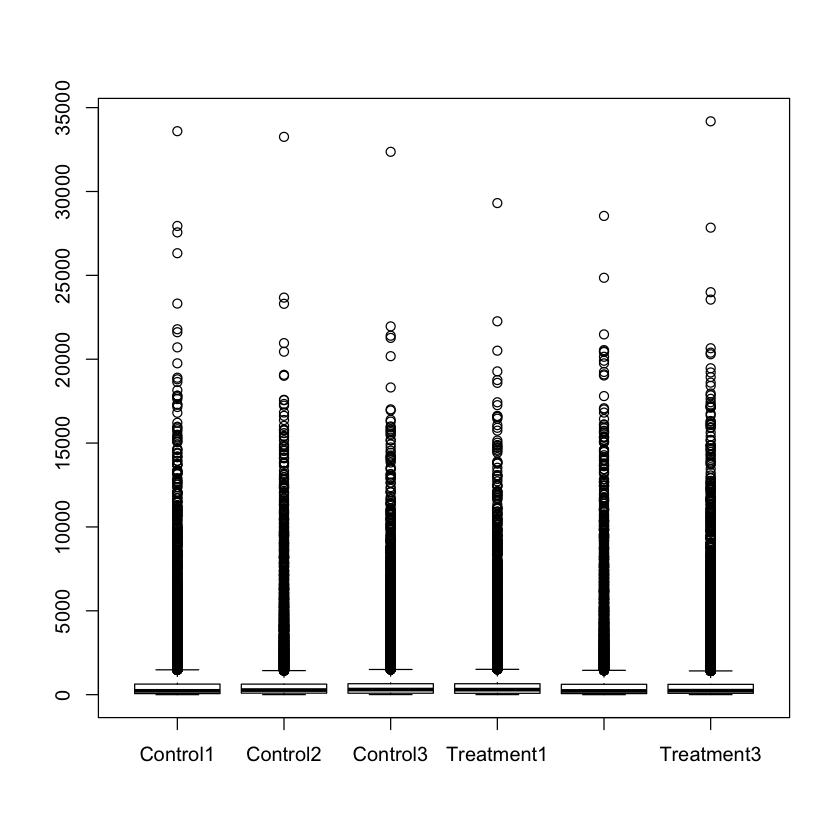

In [42]:
library(ggplot2)
experiments<-c('Control1','Control2','Control3','Control4','Control5','Control6')
boxplot(data)
